In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import scipy.stats as stats

from sklearn.ensemble import RandomForestClassifier

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [5]:
path_train = '../data/train.csv'

In [6]:
data = pd.read_csv(path_train)
data.head()
data.columns
X = data.iloc[:,1:-2]
y = data.iloc[:,-2:]

# General

In [7]:
print(X.describe())

       hla_match_c_high  hla_high_res_8  hla_low_res_6  hla_high_res_6  \
count      24180.000000    22971.000000   25530.000000    23516.000000   
mean           1.764516        6.876801       5.143322        5.109202   
std            0.431941        1.564313       1.207757        1.214162   
min            0.000000        2.000000       2.000000        0.000000   
25%            2.000000        6.000000       4.000000        4.000000   
50%            2.000000        8.000000       6.000000        6.000000   
75%            2.000000        8.000000       6.000000        6.000000   
max            2.000000        8.000000       6.000000        6.000000   

       hla_high_res_10  hla_match_dqb1_high    hla_nmdp_6  hla_match_c_low  \
count     21637.000000         23601.000000  24603.000000     26000.000000   
mean          8.617230             1.736876      5.160346         1.757808   
std           1.905125             0.447687      1.203240         0.435453   
min           3.00000

In [8]:
print(X.describe(include=['object']))

           dri_score psych_disturb cyto_score diabetes tbi_status arrhythmia  \
count          28646         26738      20732    26681      28800      26598   
unique            11             3          7        3          8          3   
top     Intermediate            No       Poor       No     No TBI         No   
freq           10436         23005       8802    22201      18861      25203   

              graft_type vent_hist renal_issue pulm_severe  ...  \
count              28800     28541       26885       26665  ...   
unique                 2         2           3           3  ...   
top     Peripheral blood        No          No          No  ...   
freq               20546     27721       26548       24779  ...   

               gvhd_proph rheum_issue sex_match          race_group  \
count               28575       26617     28539               28800   
unique                 17           3         4                   6   
top     FK+ MMF +- others          No       M-M  M

# Missing values analysis

In [9]:
null_counts = X.isnull().sum()
print(null_counts)

dri_score                   154
psych_disturb              2062
cyto_score                 8068
diabetes                   2119
hla_match_c_high           4620
hla_high_res_8             5829
tbi_status                    0
arrhythmia                 2202
hla_low_res_6              3270
graft_type                    0
vent_hist                   259
renal_issue                1915
pulm_severe                2135
prim_disease_hct              0
hla_high_res_6             5284
cmv_status                  634
hla_high_res_10            7163
hla_match_dqb1_high        5199
tce_imm_match             11133
hla_nmdp_6                 4197
hla_match_c_low            2800
rituximab                  2148
hla_match_drb1_low         2643
hla_match_dqb1_low         4194
prod_type                     0
cyto_score_detail         11923
conditioning_intensity     4789
ethnicity                   587
year_hct                      0
obesity                    1760
mrd_hct                   16597
in_vivo_

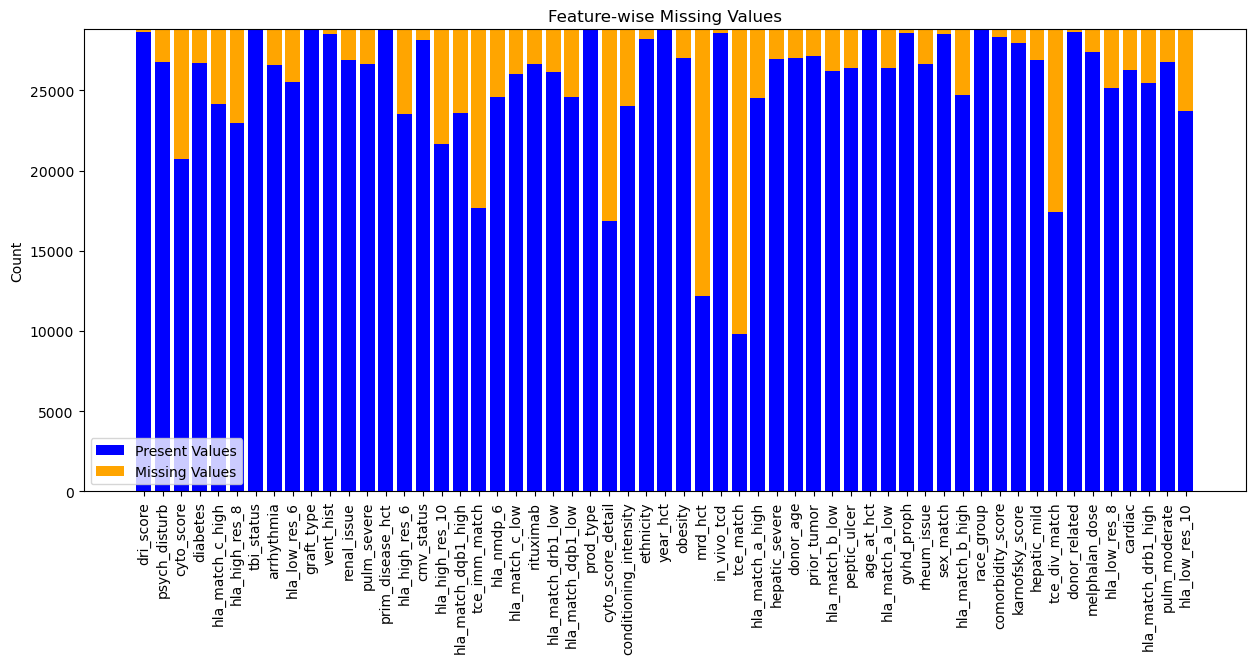

In [10]:
# For each feature, bar plot of missing values against non-missing values:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming X is your actual dataset (no sampling)
missing_counts = X.isna().sum()
present_counts = X.notna().sum()

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(X.columns, present_counts, color='blue', label='Present Values')
ax.bar(X.columns, missing_counts, color='orange', bottom=present_counts, label='Missing Values')

# Labels and formatting
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Feature-wise Missing Values")
plt.legend()
plt.show()

# Numerical variables analysis

In [11]:
# Processing age columns: age_at_hct, donor_age

X['age_at_hct'] = np.round(X['age_at_hct'])
X['donor_age'] = np.round(X['donor_age'])

### Pairplots

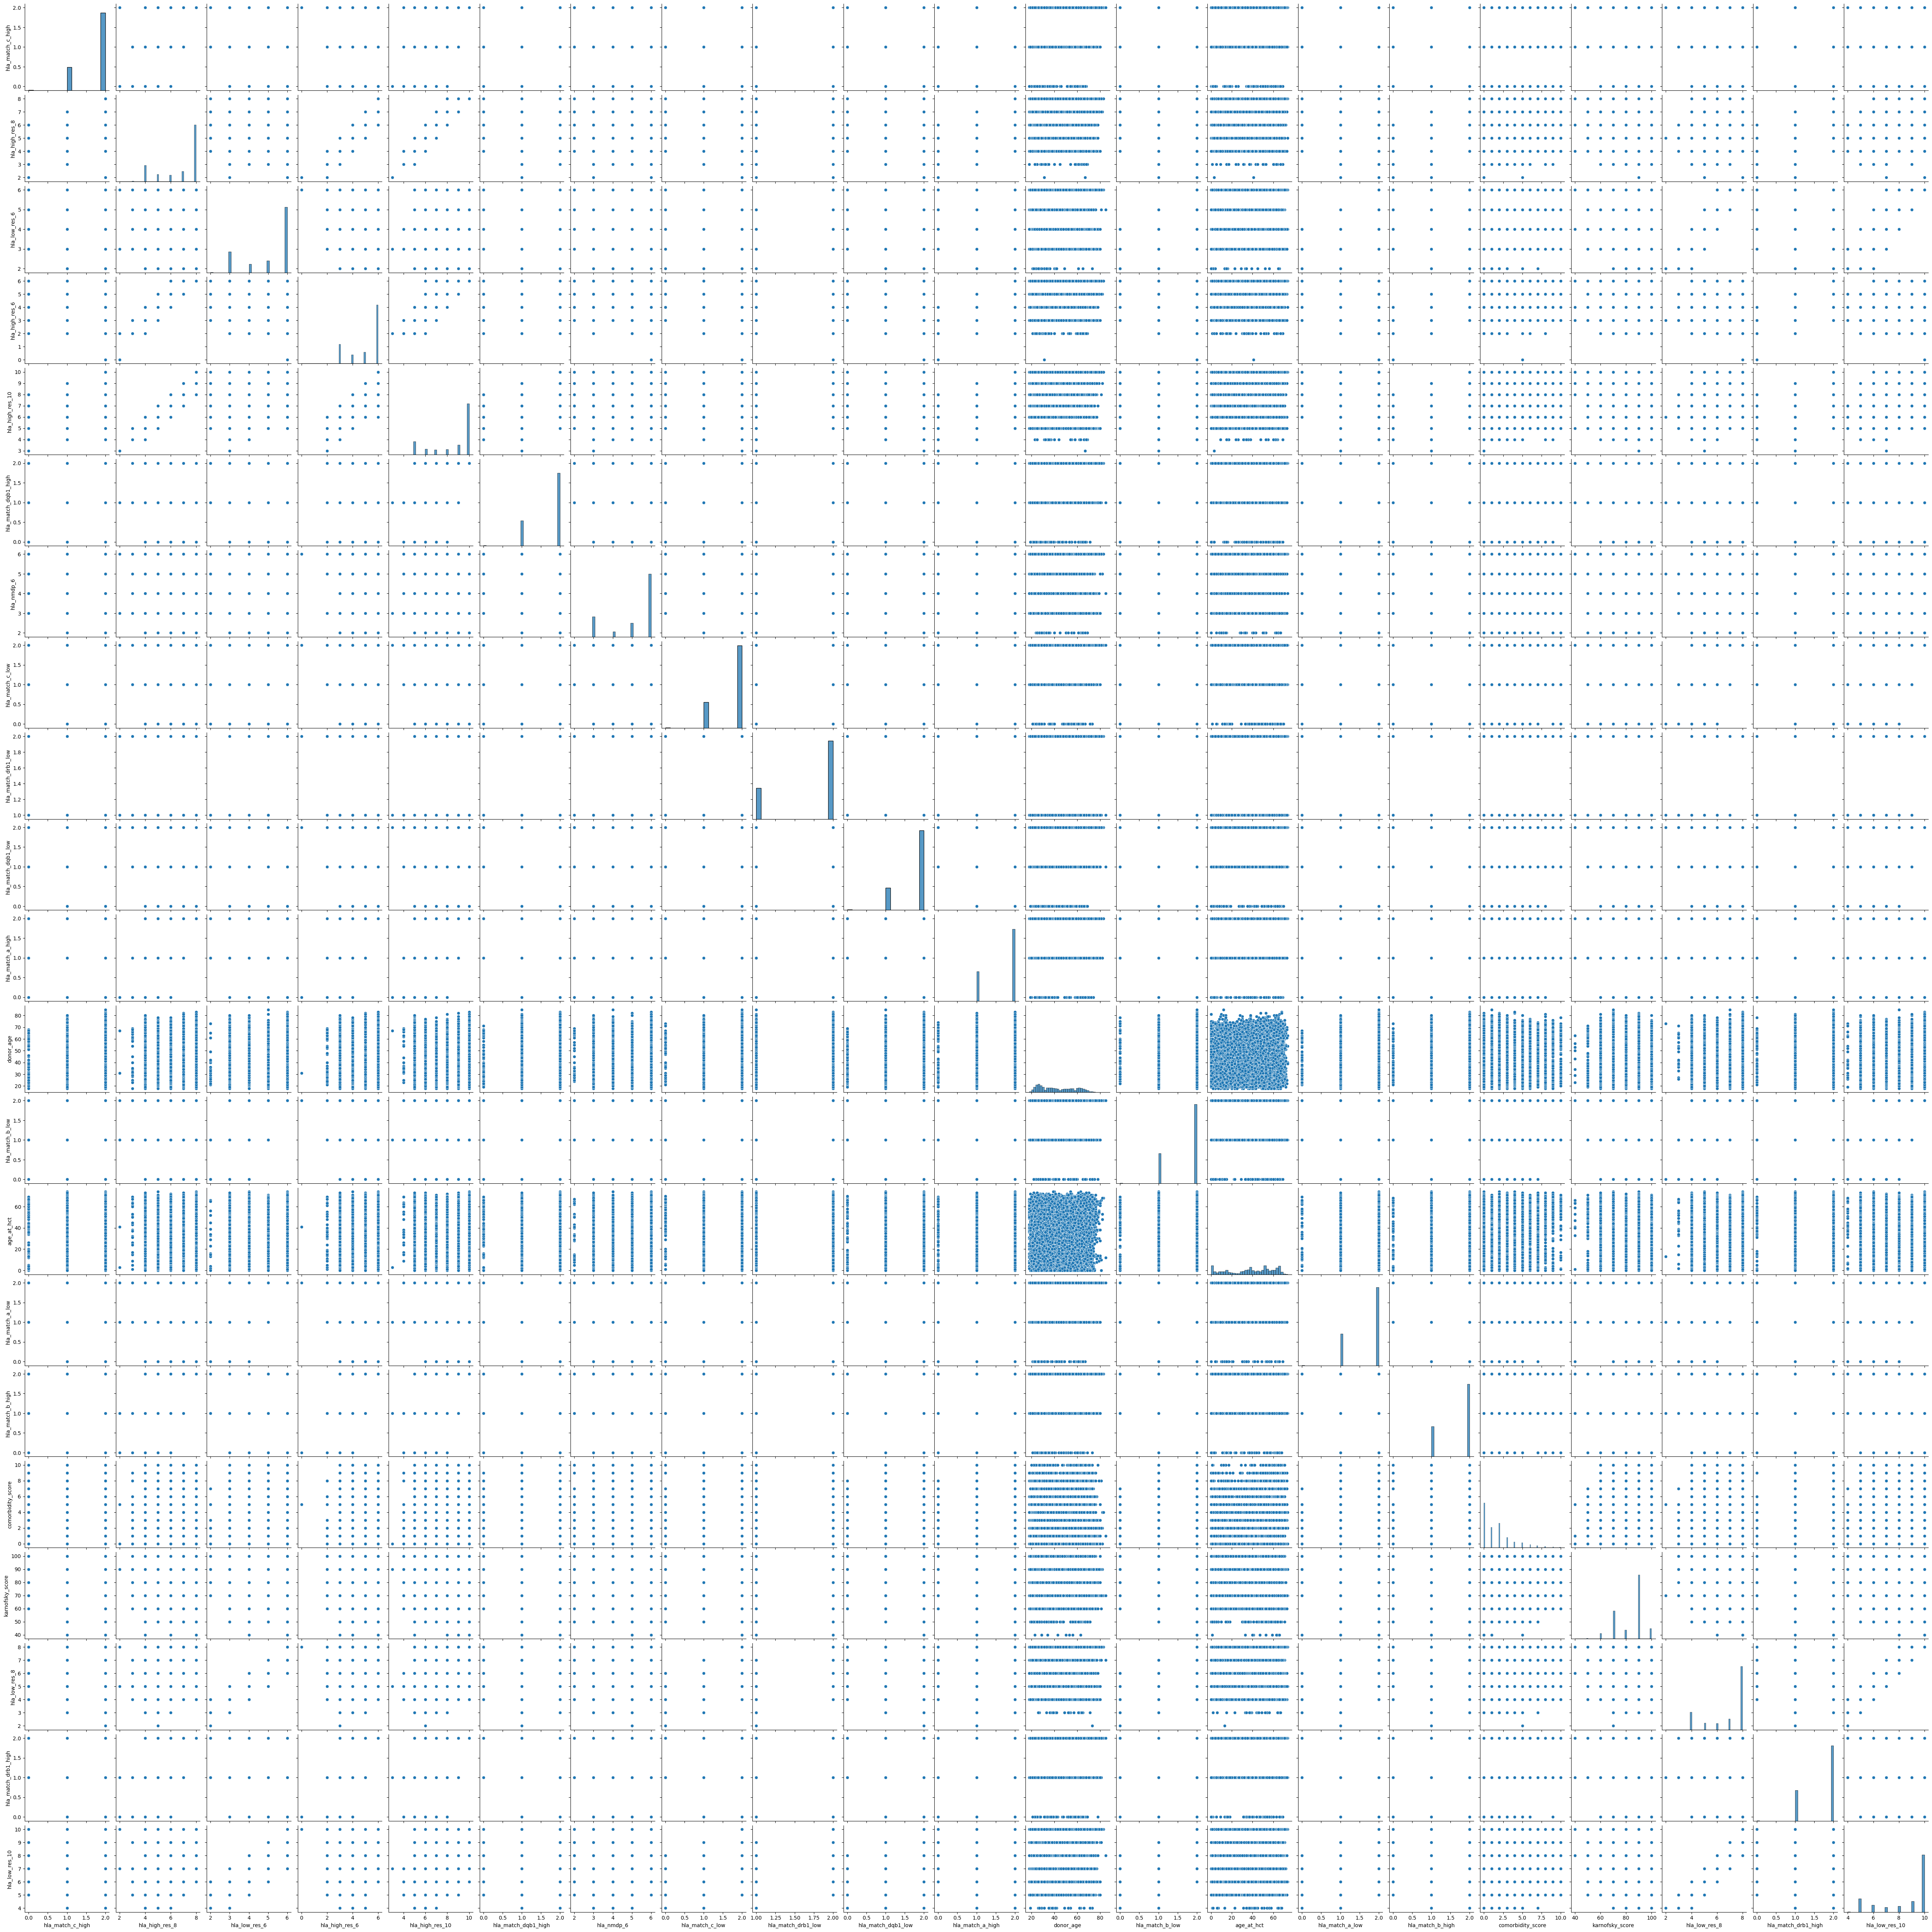

In [12]:
sns.pairplot(X.select_dtypes(include=["float64"]))

### Correlation matrix

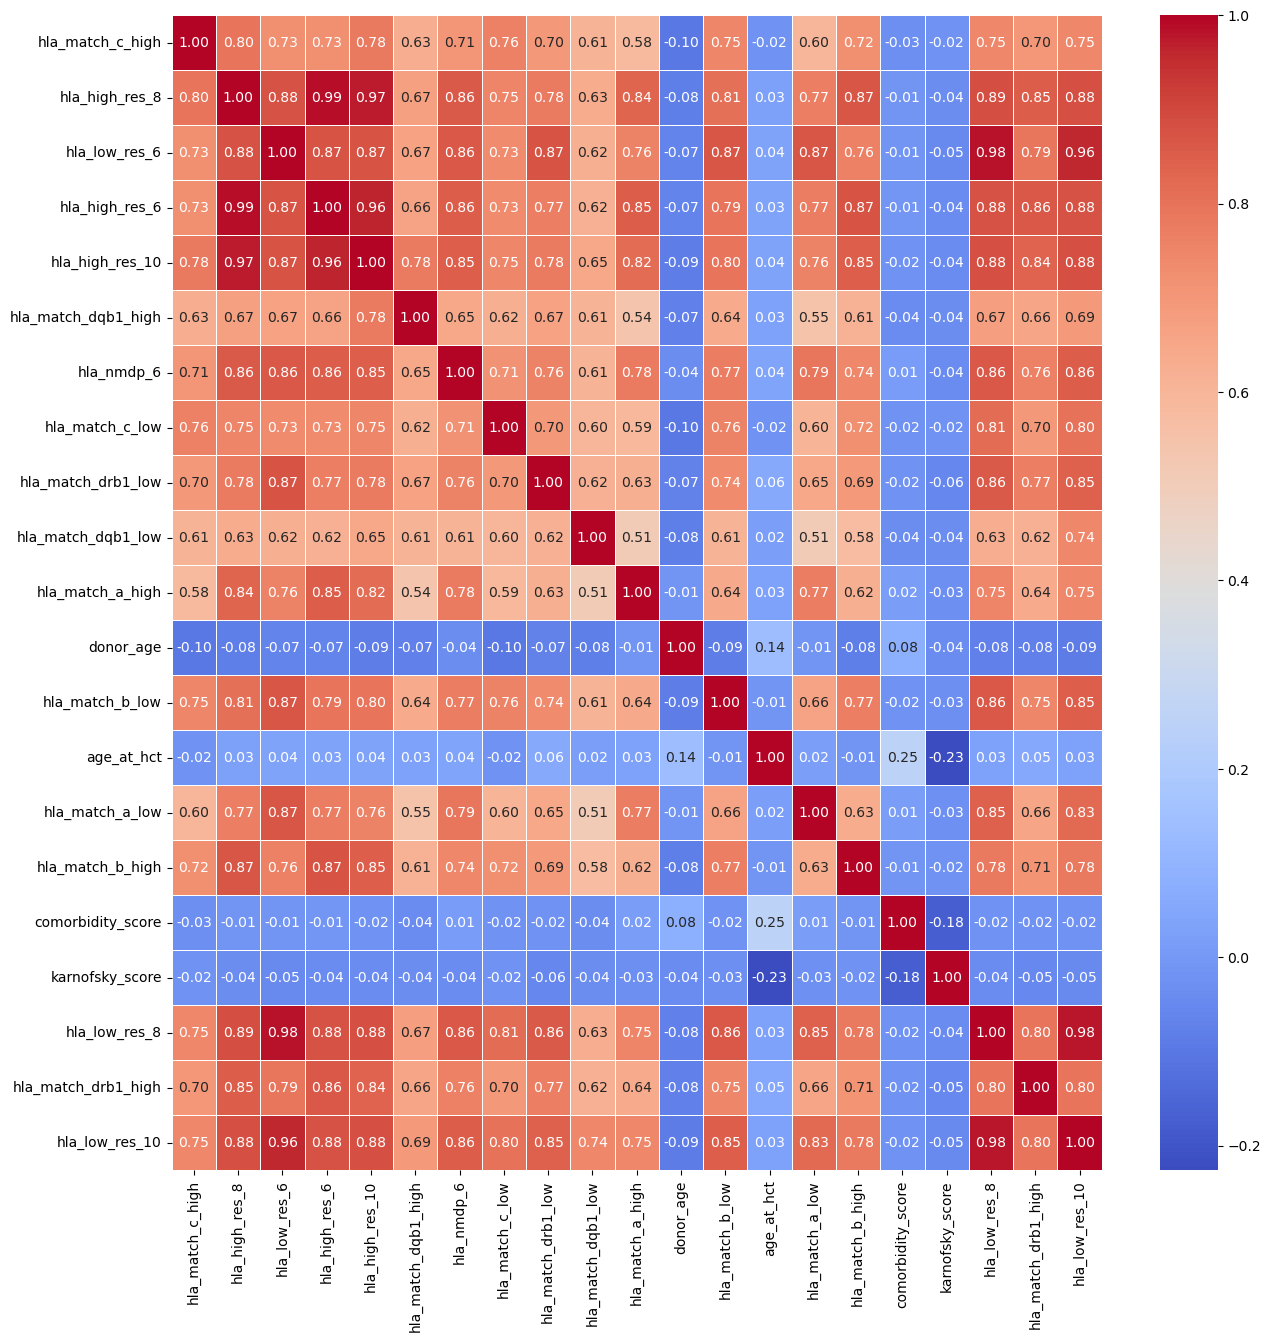

In [13]:
corr_matrix = X.select_dtypes(include=["float64"]).corr(method='spearman')
plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [14]:
# Recording all pairs with strong correlations (above 0.7)
high_corr_pairs = []

# Iterate over the correlation matrix, only checking the upper triangle
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        correlation = corr_matrix.iloc[i, j]
        
        if correlation > 0.7:
            high_corr_pairs.append((col1, col2, correlation))

for pair in high_corr_pairs:
    print(f"Pair: {pair[0]} and {pair[1]}, Correlation: {pair[2]:.2f}")
print(len(high_corr_pairs))

Pair: hla_match_c_high and hla_high_res_8, Correlation: 0.80
Pair: hla_match_c_high and hla_low_res_6, Correlation: 0.73
Pair: hla_match_c_high and hla_high_res_6, Correlation: 0.73
Pair: hla_match_c_high and hla_high_res_10, Correlation: 0.78
Pair: hla_match_c_high and hla_nmdp_6, Correlation: 0.71
Pair: hla_match_c_high and hla_match_c_low, Correlation: 0.76
Pair: hla_match_c_high and hla_match_b_low, Correlation: 0.75
Pair: hla_match_c_high and hla_match_b_high, Correlation: 0.72
Pair: hla_match_c_high and hla_low_res_8, Correlation: 0.75
Pair: hla_match_c_high and hla_match_drb1_high, Correlation: 0.70
Pair: hla_match_c_high and hla_low_res_10, Correlation: 0.75
Pair: hla_high_res_8 and hla_low_res_6, Correlation: 0.88
Pair: hla_high_res_8 and hla_high_res_6, Correlation: 0.99
Pair: hla_high_res_8 and hla_high_res_10, Correlation: 0.97
Pair: hla_high_res_8 and hla_nmdp_6, Correlation: 0.86
Pair: hla_high_res_8 and hla_match_c_low, Correlation: 0.75
Pair: hla_high_res_8 and hla_matc

In [18]:
# Defining categorical and numercial features

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)
print(len(categorical_cols))
print(len(numerical_cols))

Categorical columns: Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status',
       'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe',
       'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab',
       'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
       'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe',
       'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match',
       'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'cardiac', 'pulm_moderate'],
      dtype='object')
Numerical columns: Index(['hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6', 'hla_high_res_6',
       'hla_high_res_10', 'hla_match_dqb1_high', 'hla_nmdp_6',
       'hla_match_c_low', 'hla_match_drb1_low', 'hla_match_dqb1_low',
       'year_hct', 'hla_match_a_high', 'donor_age', 'hla_match_b_low',
       'age_at_hct', 'hla_match_a_low', 'hla_match_b_high',
       '

### Pointplots of numerical features against categorical features

In [20]:
output_pdf = "pointplots.pdf"

with PdfPages(output_pdf) as pdf:
    for cat_col in categorical_cols:
        for num_col in numerical_cols:
            plt.figure(figsize=(10, 10)) 
            sns.pointplot(x=X[cat_col], y=X[num_col], data=X, errorbar=("ci", 95))
            
            plt.title(f"Pointplot of {num_col} by {cat_col}")
            plt.xticks(rotation=45) 
            
            pdf.savefig()  
            plt.close()  

print(f"All point plots saved in {output_pdf}")

All point plots saved in pointplots.pdf


### Heatmaps of categorical and numerical features

In [19]:
from matplotlib.backends.backend_pdf import PdfPages

output_pdf = "all_plots.pdf"

with PdfPages(output_pdf) as pdf:
    for cat_col in categorical_cols:
        for num_col in numerical_cols:
            pivot_table = X.pivot_table(index=cat_col, columns=num_col, aggfunc='size', fill_value=0)
            plt.figure(figsize=(10,10))
            sns.heatmap(pivot_table, annot=True, cmap='Blues')
            plt.title(f"Heatmap: {num_col} vs {cat_col}")
            plt.xticks(rotation=45)
            
            pdf.savefig() 
            plt.close()  

print(f"All plots saved in {output_pdf}")


All plots saved in all_plots.pdf


# Categorical variables analysis

### Crosstabs

In [22]:
# Due to a very large number of categorical features, creating all possible crosstabs is not feasible and not informative
# so we first create pairs with Cramer's V above 0.3, and then plot crossmaps

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            cramers_matrix.loc[col1, col2] = cramers_v(X[col1], X[col2])
        else:
            cramers_matrix.loc[col1, col2] = 1.0 

# Converting to numeric values
cramers_matrix = cramers_matrix.astype(float)

# Keeping only strong correlations
strong_pairs = [(col1, col2) for col1 in categorical_cols for col2 in categorical_cols 
                if col1 != col2 and cramers_matrix.loc[col1, col2] > 0.3]
for i in strong_pairs:
    print(i)

('dri_score', 'graft_type')
('dri_score', 'prod_type')
('graft_type', 'dri_score')
('graft_type', 'prim_disease_hct')
('graft_type', 'prod_type')
('graft_type', 'gvhd_proph')
('prim_disease_hct', 'graft_type')
('prim_disease_hct', 'prod_type')
('prim_disease_hct', 'in_vivo_tcd')
('tce_imm_match', 'tce_match')
('tce_imm_match', 'tce_div_match')
('prod_type', 'dri_score')
('prod_type', 'graft_type')
('prod_type', 'prim_disease_hct')
('conditioning_intensity', 'melphalan_dose')
('in_vivo_tcd', 'prim_disease_hct')
('tce_match', 'tce_imm_match')
('tce_match', 'tce_div_match')
('gvhd_proph', 'graft_type')
('tce_div_match', 'tce_imm_match')
('tce_div_match', 'tce_match')
('melphalan_dose', 'conditioning_intensity')


In [25]:
output_pdf = "heatmaps_for_categorical.pdf"

with PdfPages(output_pdf) as pdf:
    for col1, col2 in strong_pairs:
        ctab = pd.crosstab(X[col1], X[col2])
        
        plt.figure(figsize=(10, 10))  # Adjust size for readability
        sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Crosstab: {col1} vs {col2}')
        plt.xlabel(col2)
        plt.ylabel(col1)
        plt.xticks(rotation=90, fontsize=14)
        plt.yticks(fontsize=14)

        pdf.savefig()  # Save current figure to PDF
        plt.close()  # Free memory

print(f"All heatmaps saved in {output_pdf}")

All heatmaps saved in heatmaps_for_categorical.pdf


### Main Takeaways

- At the moment, the most useful is the **correlation matrix for numerical variables**. It gives a good idea of which variables could be dropped.  
- Because of the **large number of categorical features (35)**, the number of pairwise plots is (prohibitively) large.  
- I did not spend enough time studying these plots to be able to gain any insights.  
